# Predicting Rain in Australia with Binary Classification

### Frame the problem and look at the big picture:
    
#### We need to predict whether or not it will rain tomorrow. This will be a binary classification problem because we need to predict the probability that an instance belongs to one of the two classes: rain or no rain. In this model, it will be better to have a higher recall as opposed to a higher precision because we want people to be able to plan ahead for rain, as opposed to be expecting a sunny day and be surprised by rain.

### Get the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/ryanmartin/Downloads/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Explore the Data

In [4]:
len(df)

145460

#### We will then explore the data by studying its attributes and characteristics. By calling the pandas info function we can see all the datatypes present in each feature in the data. This information will be useful during the feature engineering stage, where we must prepare the data for the machine learning models. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

#### Converting Catagorical Features: We need to convert our catagorical features with get_dummies or One Hot Encoding so that our machine learning algorithm can take these features as input. This will be done during the feature engineering stage. 

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

## Prepare the Data

#### We will drop the missing values in the class to be predicted because for those instances we have no truth to base our model on.

In [8]:
df = df.dropna(subset=['RainTomorrow'], inplace=False)

#### We can see that there is an imbalance in the labels, but we will deal with that problem in the modeling stage.

In [9]:
#Percentage of Positive/Negative
def forecast(x):
    if x == "Yes":
        return 0
    if x == "No":
        return 1
df_target = df['RainTomorrow'].apply(forecast)
print("Yes: ", df_target.value_counts()[0]/len(df_target)*100,"%")
print("No: ", df_target.value_counts()[1]/len(df_target)*100,"%")

Yes:  22.418121848473554 %
No:  77.58187815152645 %


#### We must also drop RISK-MM because this feature represents the amount of measured rain the next day. This can leak information into the model and reduce predictability. 

In [10]:
df = df.drop(["RISK_MM"], axis=1)

#### We have many missing values that will be dealt with when creating the data pipeline

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

#### Based on the concept of reading a barometer, it is widely known that decreasing pressure can be an indication of rain; therefore, we will create an new feature attribute "change_in_pressure" that will be added to our dataframe. 

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
Pressure9am_ix, Pressure3pm_ix = [
    list(df.columns).index(col)
    for col in ("Pressure9am", "Pressure3pm")]

In [13]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_change_in_pressure=True):
    change_in_pressure = X[:, Pressure9am_ix]- X[:, Pressure3pm_ix]
    return np.c_[X, change_in_pressure]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_change_in_pressure": False})
weather_extra_attribs = attr_adder.fit_transform(df.values)

#### weather_extra_attributes simply demonstrates the effect of this function on the dataframe. We will use this function in our data pipeline.

In [14]:
weather_extra_attribs = pd.DataFrame(
    weather_extra_attribs,
    columns=list(df.columns)+["change_in_pressure"],
    index=df.index)

weather_extra_attribs.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,change_in_pressure
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44,W,...,22,1007.7,1007.1,8,NaN,16.9,21.8,No,No,0.6
1,2008-12-02,Albury,7.4,25.1,0,NaN,NaN,WNW,44,NNW,...,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2.8
2,2008-12-03,Albury,12.9,25.7,0,NaN,NaN,WSW,46,W,...,30,1007.6,1008.7,NaN,2,21,23.2,No,No,-1.1
3,2008-12-04,Albury,9.2,28,0,NaN,NaN,NE,24,SE,...,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4.8
4,2008-12-05,Albury,17.5,32.3,1,NaN,NaN,W,41,ENE,...,33,1010.8,1006,7,8,17.8,29.7,No,No,4.8


### Train/Test Split:

#### We will create a test set by setting the rain tomorrow attribute to "y" and replacing the "Yes" values with 1 and the "No" values with 0, which will increase the predictability in our binary classifier. The training data will be set to "X". We will then call the train_test_split method to avoid creating a machine learning model that would just repeat the labels that it had just seen and fail to predict any new unseen data, we must divide and set aside a portion of our data as a test set (X_test, y_test). This will help avoid the situation of overfitting our model.

In [15]:
X = weather_extra_attribs.drop('RainTomorrow', axis=1)
y = weather_extra_attribs['RainTomorrow']
y = y.replace({'No':0, 'Yes':1})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Pipelining:

#### Data Pipelining is useful in this case because we have a lot of feature selection and normalization happening to our dataset.

#### In the numeric_transformer, the simple imputer will fill the missing numeric values with the median values of the entire dataset. This will allow us to keep much of our data for training. Our function transformer will add the feature "change_in_pressure" to our data, and the standard scaler will subtract the mean value and then divide it by the standard deviation so that the resulting distribution has unit variance. This will lower the effectiveness of outliers. 

#### In the categorical_transformer, our simple imputer will fill the missing categorical features with a "missing" value, which will allow us to keep more of our data, and the 'missing' values can still be used in training. The one hot encoder will then change our categorical features to numeric features by adding a 1 for each class and a 0 for not belonging to a particular class. Consequently, this will add more rows to our data, just like the get_dummies function. 

#### Creating a pipeline is the preferred method because it encapsulates all the feature engineering. You can also perform joint parameter selection, so you can perform grid search over all the estimators in the pipeline at once. Finally, pipelines provide a safe way to avoid leaking statistics from the test data into the trained model in cross-validation by ensuring that the same samples are used to trian the transformers and predictors. 

#### Correction: data frame will include extra features because Function Transformer causes unknown error. 

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#### Column transformer ensures the success of transforming the data for different transformations for different columns of data

In [17]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).drop(['RainTomorrow'], axis=1).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Select and Train a Model

## Logistic Regression

#### We will used logistic regression in this classification task that will estimate the probability that it rains tomorrow in Australia. If the estimated probability is greater than 50%, then the model predicts that instance belongs to that class. Since it labels the instance as "1" for positive, and "0" for negative that makes logistic regression a binary classifier.  

In [18]:
from sklearn.linear_model import LogisticRegression
lc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

#### We will fit our pipeline to our training data, which will preprocess that data and fit that data into a logistic regession model. 

In [19]:
lc.fit(X_train, y_train)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [20]:
y_pred = lc.predict(X_test)

# Evaluate Logistic Regression Model

#### We will evaluate our logistic regression model using the accuracy score for classification. This function computes subset accuracy, which is the set of labels predicted for a sample that exactly match the corresponding set of labels in y_true.

#### In our case, we obtained 85% accuracy. 

In [21]:

from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8503111923766659


#### We can now assess the accuracy of our model with cross validation, which will generate cross-validated estimates for each input data point. It will accomplish this task by taking the data and splitting it according to the cv parameter where each sample belongs to one test set and the prediction is computed with an estimator fitted on the training set. 

In [22]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lc, X_train, y_train, cv=3)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### We will evaluate the weaknesses of this classification model with a confusion matrix, which shows the number of observations known to be in oned group but predicted to be in another group.

#### In our confusion matrix below, we have 83130 True Negatives, 5181 False Positives, 11566 False Negatives, and 13877 True Positives. (This may change slightly). 

In [23]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred)

array([[83191,  5119],
       [11607, 13837]])

#### We can get more precise metrics with the precision and recall scores.

#### precision = TP/ TP + FP
#### recall = TP/ TP + FN

In [24]:

from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred)

0.729953576703946

In [25]:

recall_score(y_train, y_pred)

0.5438217261436881

#### The f1-Score tells us the harmonic mean of precision and recall.

#### The F1 score takes the weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.  

#### F1 = 2 * (precision * recall) / (precision + recall)

In [26]:

from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

0.6232882882882882

In [27]:

y_score = lc.decision_function(X_test)

In [28]:

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.72


In [29]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

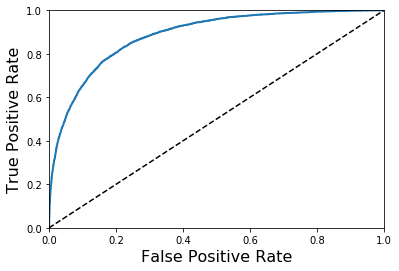

In [53]:
# Note to grader: Run this cell twice to see graph!!!!
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

#### The roc_auc_score computes the area under the roc_curve, which measures the True Positive Rate vs. the False Positive Rate. A perfect auc_score would be 1, and a random classifier score would be .5. Ours is .88

In [31]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_score)

0.8856377496300312

# Random Forest Classifier

#### A random forest classifier is essentially a ensemble of decision trees trained via the bagging method. It usually performs well because the algorithms produces extra randomness when growing the trees instead of searching for the best feature when splitting a node. This results in more tree diversity and an overall better model . We will attempt to train a random forest classifier and compare its evaluation metrics to the logistic regression model. 

In [32]:

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', forest_clf)])
y_probas_forest = cross_val_predict(rfc, X_train, y_train, cv=3,
                                    method="predict_proba")

In [33]:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

#### In comparing roc_curves from our random forest model and logistic regression model, it seems that the logistic regression model is performing better. 

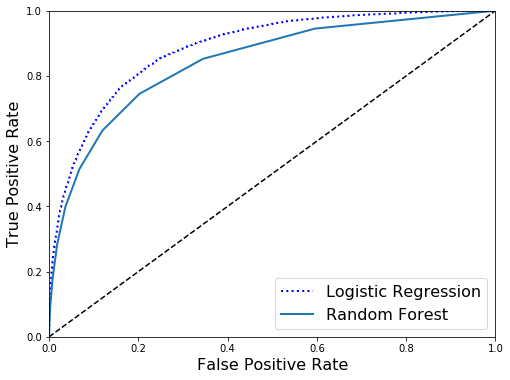

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [35]:

roc_auc_score(y_train, y_scores_forest)

0.8428405945911872

In [36]:

y_train_pred_forest = cross_val_predict(rfc, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_forest)

0.758816922500936

In [37]:

recall_score(y_train, y_train_pred_forest)

0.3982864329507939

#### Judging from the metrics displayed in the above cells, our random forest classifier actually performed slightly worse than our logistic regression model. Our recall score was especially weak at around .40

# Fine Tune the Model

## Boosting Recall Score with SMOTE (Synthetic Minority Over-sampling Technique)

#### Smote is where the minority class is over-sampled by creating "synthetic" examples. From this, we generate synthetic examples by operating in feature space. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining all of the k minority class nearest neighbors. 

#### The synthetic examples cause the classifier to create larger and less specific decision regions; thus, more general regions are now learned for the minority class samples rather than those being subsumed by the majority class samples around them. The effect is that decision trees generalize better.

In [38]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE

In [39]:


clf = LogisticRegression(solver = 'lbfgs')
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), clf)


In [40]:
smote_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', smote_pipeline)])

smote_model.fit(X_train, y_train)
y_pred = smote_model.predict(X_test)


/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:

from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8059706740743345


In [42]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(smote_model, X_train, y_train, cv=3)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### We can see already from the confusion matrix that SMOTE is reducing the number of false negatives. 

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred)

array([[72261, 16049],
       [ 5690, 19754]])

In [44]:
y_score_smote = smote_model.decision_function(X_test)

In [45]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score_smote)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.71


In [46]:

from sklearn.metrics import roc_curve

fpr_smote, tpr_smote, thresholds = roc_curve(y_test, y_score_smote)

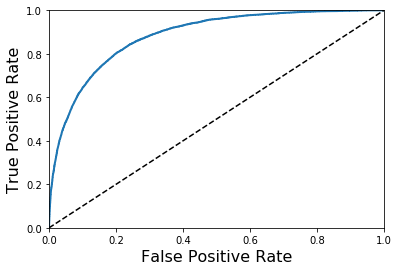

In [47]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plot_roc_curve(fpr_smote, tpr_smote)
plt.show()

In [48]:
roc_auc_score(y_train, y_pred)

0.7973184209040799

In [49]:
y_train_pred_smote = cross_val_predict(smote_model, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_smote)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5517414741781415

In [50]:
recall_score(y_train, y_train_pred_smote)

0.7763716396792957

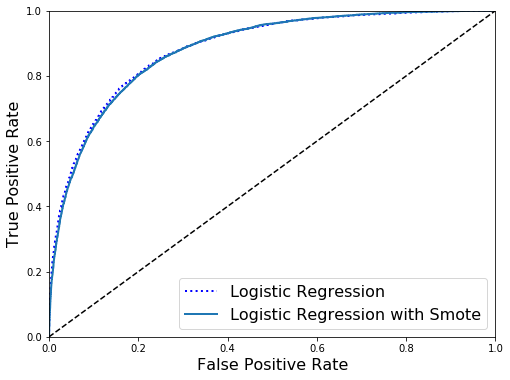

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_smote, tpr_smote, "Logistic Regression with Smote")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

#### By tuning our logistic regression model with SMOTE, we sacrificed a little bit of precision for better recall, but this is what we wanted because a weather prediction has no value if it predicts that it will not rain when it actually does rain the next day. This would be a false negative. Having a higher recall means less false negatives, and in this case less false negatives mean less false predictions that it will not rain the next day. In our model we wanted more recall, so that people could know if it would rain the next day and plan accordingly. Since it does not rain often in Australia, the rainy days were in the minority class, so we had to use SMOTE to handle this imbalanced data. Luckily, this strategy worked and we now have a model with higher recall. 